Information about data:
    
    -> The data set is taken from the UCI machine learning repository
    
    -> All the messages in the data set are divided into SPAM or HAM
    
    -> There were 5574 messages in the data set

OBJECTIVE:
    
    -> Analyze the messgaes from both spam and ham
    
    -> Dividing the messages into spam or ham by using Natural Language Processing

Importing required libraries and dataset

In [60]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as s

In [61]:
data = pd.read_csv("SMSSpamCollection", sep='\t', names= ['label','message'])
print(data.head(5))

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [62]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [63]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Adding length column to the dataframe which is the length of each Message

In [64]:
data['length'] = data['message'].apply(len)

In [65]:
# Sample of daat frame
data.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


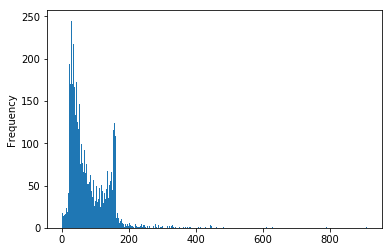

In [66]:
# Histogram of lengths of messages
data['length'].plot.hist(bins=400)

In [67]:
#Information about the length column
data['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [68]:
# Highest length message
data[data['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Length histograms of ham and spam


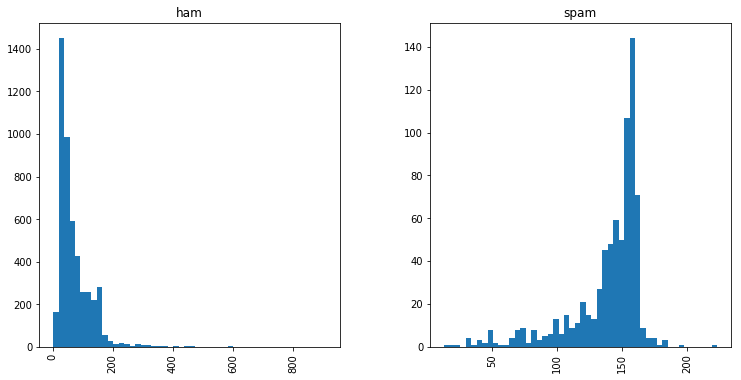

In [69]:
print("Length histograms of ham and spam")
data.hist(column='length', by='label',bins=50, figsize=(12,6))
mp.show()

Using Seaborn the length distribution plots


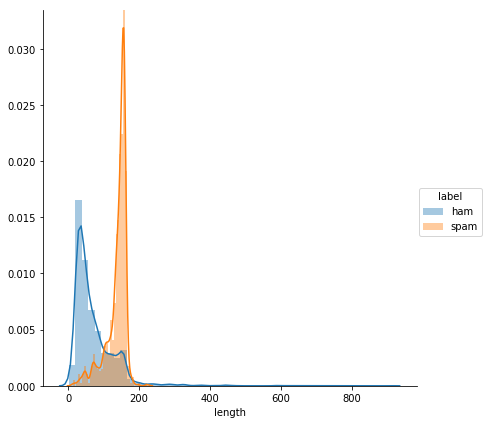

In [70]:
print("Using Seaborn the length distribution plots")
s.FacetGrid(data=data, hue='label', size=6).map(s.distplot, 'length').add_legend()
mp.show()

Observation:
    
    -> Most of the ham messages are near by to the length of 100
    
    -> Spam messages are more in the range between the length of 150 and 200

DATA PRE-PROCESSING

In [107]:
import string
print("Sample processing of a message")
print("-------------------------------")
mess = 'Message @ pre - processing to show the <sample>'
print("Message :",mess)
print("--------------------------------")
print("After removing the punctuations with the help of string punctuation all the words in the message are converted to list")
print("---------------------------------")
nopunc = [c for c in mess if c not in string.punctuation]
print(nopunc)
print('---------------------------------')
print("Joining the characters into words to form a sentence and for further computation")
print("--------------------------------")
nopunc = ''.join(nopunc)
print(nopunc)
print("---------------------------------")
print("Splitting to remove stop words")
nopunc = nopunc.split()
print(nopunc)
clean_mess = [word for word in nopunc if word.lower() not in stopwords.words('english') ]
print("---------------------------------")
print("After removal of stop words")
print(clean_mess)

Sample processing of a message
-------------------------------
Message : Message @ pre - processing to show the <sample>
--------------------------------
After removing the punctuations with the help of string punctuation all the words in the message are converted to list
---------------------------------
['M', 'e', 's', 's', 'a', 'g', 'e', ' ', ' ', 'p', 'r', 'e', ' ', ' ', 'p', 'r', 'o', 'c', 'e', 's', 's', 'i', 'n', 'g', ' ', 't', 'o', ' ', 's', 'h', 'o', 'w', ' ', 't', 'h', 'e', ' ', 's', 'a', 'm', 'p', 'l', 'e']
---------------------------------
Joining the characters into words to form a sentence and for further computation
--------------------------------
Message  pre  processing to show the sample
---------------------------------
Splitting to remove stop words
['Message', 'pre', 'processing', 'to', 'show', 'the', 'sample']
---------------------------------
After removal of stop words
['Message', 'pre', 'processing', 'show', 'sample']


In [109]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [110]:
print("Messages before applying the pre process")
data['message'].head(5)

Messages before applying the pre process


0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [111]:
print("Messages after applying the pre process")
data['message'].head(5).apply(text_process)

Messages after applying the pre process


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

Using Bag of Words approach to convert text to vectors

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
cv_bow = CountVectorizer(analyzer=text_process).fit(data['message'])

In [118]:
print("The number of words in the data set are:",len(cv_bow.vocabulary_))

The number of words in the data set are: 11425


In [128]:
print("Sample message before vector conversion")
m = data['message'][45]
print("Message:",data['message'][45])
print("Sample message after vector conversion")
bb = cv_bow.transform([m])
print(bb)

Sample message before vector conversion
Message: No calls..messages..missed calls
Sample message after vector conversion
  (0, 5297)	1
  (0, 5298)	1


In [127]:
print("In the above message the ")
print(cv_bow.get_feature_names()[5297])
print(cv_bow.get_feature_names()[5298])

calls
callsmessagesmissed


Observation:
    
    -> By converting the sentence to vector with Bag of Words approach, has resulted with features 5297, 5298
    
    -> The features from the model has returned exactly the sentence which is converted to vectors

In [154]:
bow_messages = cv_bow.transform(data['message'])
print("The shape of the resultant sparse matrix is:", bow_messages.shape)

The shape of the resultant sparse matrix is: (5572, 11425)


In [155]:
x_train = bow_messages[0:4000]
x_test = bow_messages[4000:]
y_train = data['label'][0:4000]
y_test = data['label'][4000:]

In [156]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 11425)
(4000,)
(1572, 11425)
(1572,)


In [157]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
spam_model = BernoulliNB().fit(x_train,y_train)

In [158]:
pred = spam_model.predict(x_test)
acc = accuracy_score(pred, y_test)
print(acc*100)


96.56488549618321


In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

        ham       0.97      0.99      0.98      1359
       spam       0.95      0.79      0.86       213

avg / total       0.97      0.97      0.96      1572

